# Logistic Regression
---

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Fitting and Visualizing a Linear Regression Using scikit-learn
---

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
glass = pd.read_csv('glass.csv')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
# changed columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Interpreting Linear Regression Coefficients
---

In [0]:
#Showing a ranked feature (column variable) list as correlated to the target, 'glass_type'
#glass[glass.columns[0:]].corr()['glass_type'][:]
glass.corr().abs().glass_type.sort_values(ascending=False)[1:]

mg    0.744993
al    0.598829
ba    0.575161
na    0.502898
fe    0.188278
ri    0.164237
si    0.151565
k     0.010054
ca    0.000952
Name: glass_type, dtype: float64

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

**Examining the glass type column in the data set.

In [0]:
#Each type of glass types?
glass['glass_type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Creating a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [0]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
# glass.household

glass['household'] = [0 if x in (1,2,3) else 1 for x in glass.glass_type]

In [0]:
glass.sample(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
46,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1,0
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00,1,0
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1,0
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00,3,0
55,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1,0
93,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,2,0
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00,1,0
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7,1
168,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5,1
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7,1


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Making a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

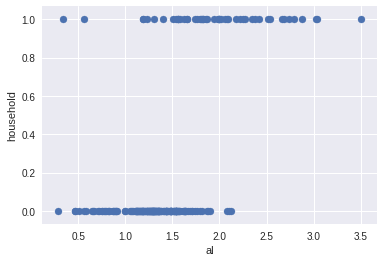

In [0]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a linear regression line like we did before:

In [0]:
linreg = LinearRegression()

In [0]:
# Fitted a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household

In [0]:
# fited(train) the model and 
# added the predicted value 'household_pred' as a new column to the dataframe glass

linreg.fit (X,y)
glass['household_pred'] = linreg.predict(X)

In [0]:
# see if the newly added predicted value shows up as a new column
glass.sample(5)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7,1,0.887389
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7,1,0.556612
76,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2,0,0.285976
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.00,0.00,6,1,0.110564
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1,0,0.130612


Text(0, 0.5, 'household')

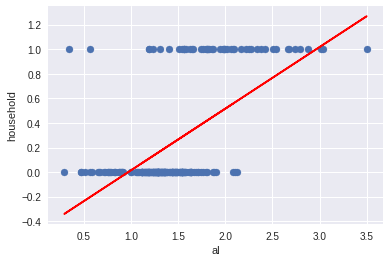

In [0]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, created a new column of our predictions for whether a row is household glass.**

In [0]:
# Transformed household_pred to 1 or 0 and assign that to a new column 'household_pred_class' in the glass dataframe
# glass['household_pred_class']
glass['household_pred_class'] = np.where(glass.household_pred>=0.5 , 1,0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


**Plotted a line that shows our predictions for class membership in household vs. not.**

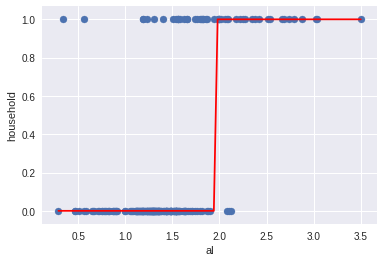

In [0]:
# sorted so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plotted the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red');

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---


**Imported the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [0]:
# Fitted a logistic regression model and store the class predictions.
logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)
print(logreg.score(X,y))

0.8411214953271028


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Plotted the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

Text(0, 0.5, 'household')

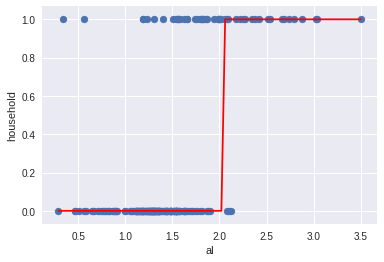

In [0]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

**Using the built-in `.predict_proba()` function, examined the predicted probabilities for the first handful of rows of `X`.**

In [0]:
logreg.predict_proba(X)[0:20]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888],
       [0.94161533, 0.05838467],
       [0.93703277, 0.06296723],
       [0.93583576, 0.06416424],
       [0.93211646, 0.06788354],
       [0.93211646, 0.06788354],
       [0.92952688, 0.07047312],
       [0.92819811, 0.07180189],
       [0.92684626, 0.07315374],
       [0.92264896, 0.07735104],
       [0.9212015 , 0.0787985 ]])

**Stored the predicted probabilities of class=1 in its own column in the data set.**

In [0]:
# Stored the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [0]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0,0.028066
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0,0.030943
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.039820
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.039820
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0,0.043012
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,1,-0.205177,0,0.047347
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,0,-0.205177,0,0.047347
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,0,-0.195154,0,0.049194
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,0,-0.160071,0,0.056212
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.0,0.00,2,0,-0.155059,0,0.057289


**Plotted the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

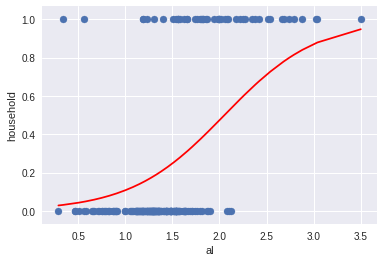

In [0]:
# Plotted the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')